In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transactions_path = '/home/mahboob/Downloads/fct_data/transactions.csv'
fraudsters_path = '/home/mahboob/Downloads/fct_data/fraudsters.csv'
users_path = '/home/mahboob/Downloads/fct_data/users.csv'

In [3]:
transactions_df = pd.read_csv(transactions_path)
fraudsters_df = pd.read_csv(fraudsters_path)
users_df = pd.read_csv(users_path)

In [4]:
transactions_df.head()

,Unnamed: 0,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID
0,0,GBP,3738,COMPLETED,2015-10-11 09:05:43.016000,bar,AUS,misc,7285c1ec-31d0-4022-b311-0ad9227ef7f4,CARD_PAYMENT,GAIA,5a9ee109-e9b3-4598-8dd7-587591e6a470
1,1,GBP,588,COMPLETED,2015-10-11 20:08:39.150000,NaN,CA,misc,20100a1d-12bc-41ed-a5e1-bc46216e9696,CARD_PAYMENT,GAIA,28d68bf4-460b-4c8e-9b95-bcda9ab596b5
2,2,GBP,1264,COMPLETED,2015-10-11 11:37:40.908000,NaN,UKR,misc,0fe472c9-cf3e-4e43-90f3-a0cfb6a4f1f0,CARD_PAYMENT,GAIA,1f1e8817-d40b-4c09-b718-cfc4a6f211df
3,3,GBP,66,REVERTED,2015-10-11 20:08:35.310000,NaN,CA,misc,20100a1d-12bc-41ed-a5e1-bc46216e9696,CARD_PAYMENT,GAIA,a7aaf78c-d201-456f-9e6d-612a795e8c32
4,4,GBP,968,COMPLETED,2015-10-11 02:46:47.640000,supermarket,NZL,misc,821014c5-af06-40ff-91f4-77fe7667809f,CARD_PAYMENT,GAIA,27dd99a2-5539-4ba9-876a-1a94abc2701f


In [13]:
fraud_transactions = pd.merge(fraudsters_df, transactions_df, left_on = 'user_id', right_on = 'USER_ID', how='left')

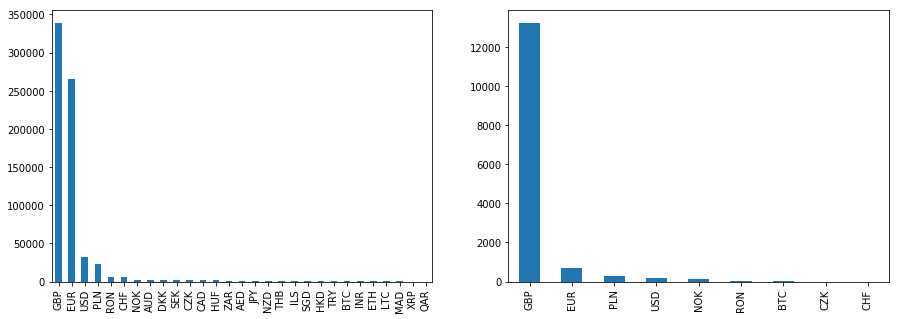

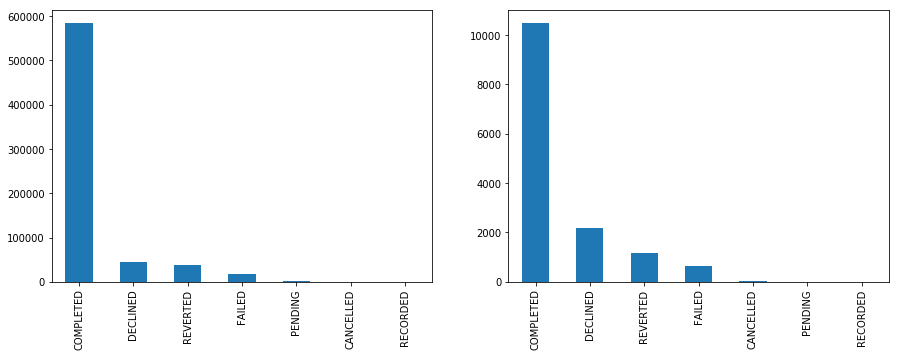

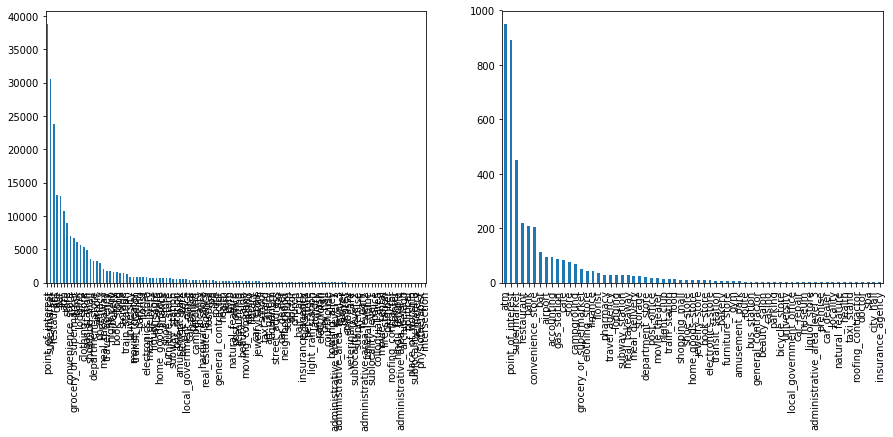

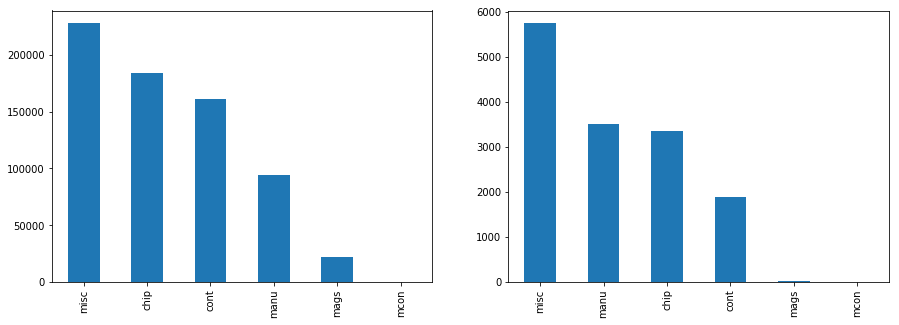

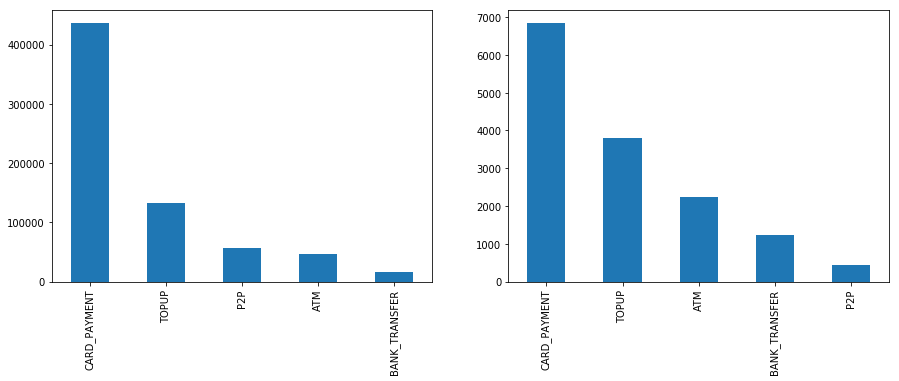

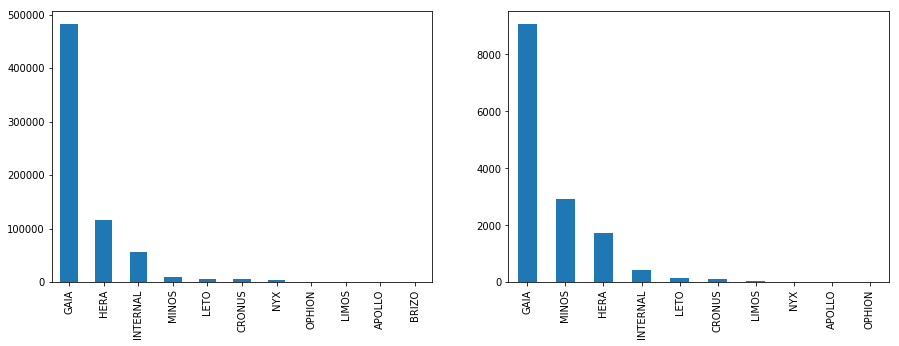

In [17]:
# Plotting categorical features for all transactions data and fraud data which suggests a strong relationship between
# the chosen features & fraud transactions

categorical_features = ['CURRENCY', 'STATE', 'MERCHANT_CATEGORY', 'ENTRY_METHOD', 'TYPE', 'SOURCE']
for feature in categorical_features:
#     plt.title(feature)
    fig, axs = plt.subplots(1,2, figsize=(15, 5))
    g = transactions_df[feature].value_counts()
    f = fraud_transactions[feature].value_counts()
    g.plot(kind='bar', ax=axs[0])
    f.plot(kind='bar', ax=axs[1])
    plt.show()

In [18]:
from datetime import datetime
#date = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S:%f")
month = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ).month
week_day = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f" ).weekday()
times_of_day = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7 ]
time_of_day = lambda x: times_of_day[datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").hour]

transactions_df['month'] = transactions_df['CREATED_DATE'].map(month)
transactions_df['day_of_week'] = transactions_df['CREATED_DATE'].map(week_day)
transactions_df['time_of_day'] = transactions_df['CREATED_DATE'].map(month)

In [22]:
fraud_transactions_w_time = pd.merge(fraudsters_df, transactions_df, left_on = 'user_id', right_on = 'USER_ID', how='left')

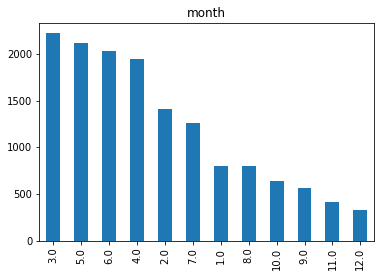

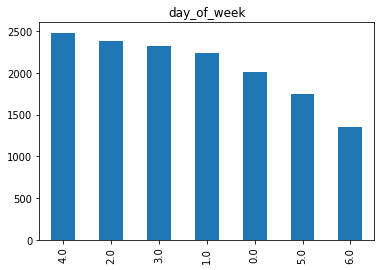

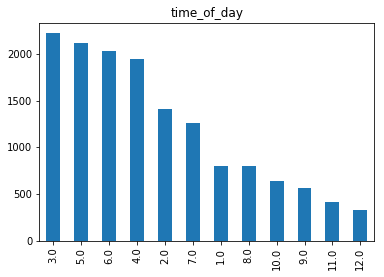

In [23]:
# Fraud transactions spread over time of the day

time_features = ['month', 'day_of_week', 'time_of_day']
for feature in time_features:
    plt.title(feature)
    g = fraud_transactions_w_time[feature].value_counts()
    g.plot(kind='bar')
    plt.show()